In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats

plt.style.use('classic')
% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
post_LTD2 = pd.read_pickle('/data/ana_post_2Hz_reci')
post_LTD50 = pd.read_pickle('/data/ana_post_EI_50Hz_reci')
post_LTD50_uni = pd.read_pickle('/data/ana_post_EI_50Hz_uni')

In [3]:
post_LTD2

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
121,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017081802,30,"[0, 1, 15, 20, 21, 22, 25, 32, 39, 42, 78]","[52, 57, 64, 65]"
122,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082302,50,"[0, 3, 24, 25, 26, 37, 47, 50]","[67, 73, 80, 81, 82, 84, 88, 90, 96, 101, 116,..."
123,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082304,40,"[16, 18, 19]","[38, 44, 50, 56, 57, 71, 84, 88, 95]"
124,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017082402,40,"[0, 2, 4, 10, 35, 54]",[37]
125,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017083001,45,"[0, 9, 20, 22, 25, 31, 35, 49, 52, 56, 59]","[57, 63, 67, 70, 71, 80, 104]"
126,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017083101,30,"[3, 5, 12, 13, 14, 15, 16, 19, 24, 44, 50, 67,...","[37, 39, 45, 46, 59, 60]"


In [4]:
post_LTD50

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
36,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032701,40,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 3...",[]
37,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032802,40,[],"[126, 128, 130, 137, 139, 141, 146, 150]"
38,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032905,20,"[9, 10, 22, 29, 30, 32, 33, 36, 37]","[6, 8, 11, 14, 22, 27, 29]"
39,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053102,20,"[19, 22, 26, 39]","[14, 19, 24, 25, 34, 36]"
172,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'raw_am...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032301,30,"[0, 1, 4, 8, 10, 19, 26, 29, 30, 31]","[37, 41, 42, 53, 62, 69, 70, 72, 87, 88, 92]"
175,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'raw_amp1':...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032802,25,[23],"[51, 60, 62]"


In [5]:
post_LTD50_uni

,Before,After,File name,elimi
30,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'ra...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032401,50
31,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032803,60
32,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062304,40
33,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017062701,24
34,"{'x': [1, 2, 3, 4, 5, 6, 7, 8], 'raw_amp1': [2...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017060803,50


/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

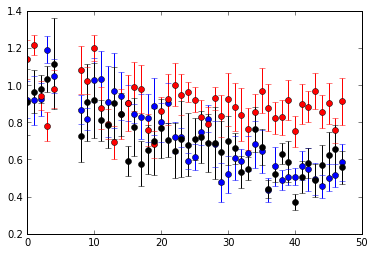

In [6]:
ave_ptl_resp = np.ones((len( post_LTD2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2, ave_ptl_2 = patch_pip.samp_ave( post_LTD2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(post_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(post_LTD50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(post_LTD50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni, ave_ptl_50_uni = patch_pip.samp_ave(post_LTD50_uni, ave_ptl_resp)
ave_ptl_mean_50_uni = ave_ptl_mean_50_uni[:-12]
ave_ptl_ste_50_uni = ave_ptl_ste_50_uni[:-12]
ave_ptl_50_uni = ave_ptl_50_uni[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

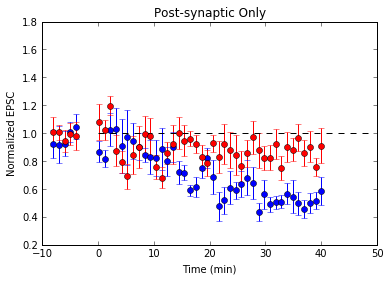

In [22]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(post_LTD2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(post_LTD50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Post-synaptic Only')

with PdfPages('/data/Figure5_3.pdf') as pdf:
    pdf.savefig()

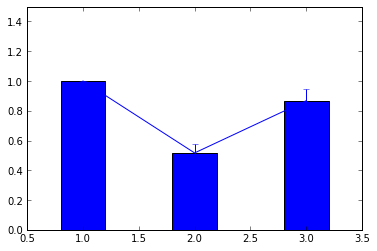

In [23]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

with PdfPages('/data/Figure3_4.pdf') as pdf:
    pdf.savefig()

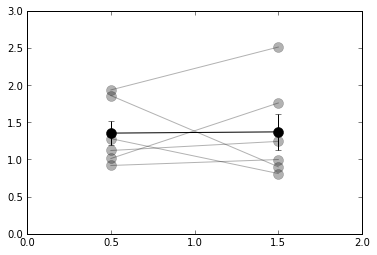

In [16]:
# Compare PPR
mean_PPR_bef = [np.nanmean(post_LTD2['Before'].loc[i]['PPR']) for i in post_LTD2['Before'].index]
mean_PPR_aft = [np.nanmean(post_LTD2['After'].loc[i]['PPR'][-10:]) for i in post_LTD2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp3_1.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


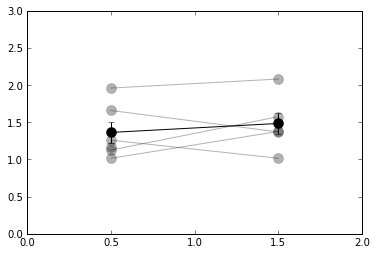

In [17]:
# Compare PPR
mean_PPR_bef = [np.nanmean(post_LTD50['Before'].loc[i]['PPR']) for i in post_LTD50['Before'].index]
mean_PPR_aft = [np.nanmean(post_LTD50['After'].loc[i]['PPR'][-10:]) for i in post_LTD50['After'].index]

mean_PPR_ave_bef = np.nanmean(mean_PPR_bef)
mean_PPR_std_bef = np.nanstd(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.nanmean(mean_PPR_aft)
mean_PPR_std_aft = np.nanstd(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'ko-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='k-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp3_2.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-3.531330222442409, pvalue=0.016716070579629472)


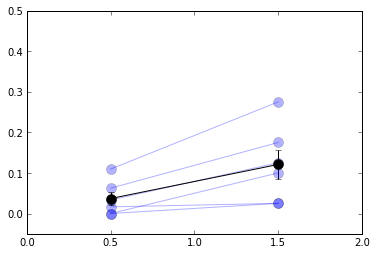

In [18]:
# Compare failure rate
mean_fail_bef = [np.sum(post_LTD2['Before'].loc[i]['failure'])/len(post_LTD2['Before'].loc[i]['failure']) for i in post_LTD2['Before'].index]
mean_fail_aft = [np.sum(post_LTD2['After'].loc[i]['failure'][-40:])/40 for i in post_LTD2['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure3_5.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-2.9347424320758018, pvalue=0.032453784035746447)


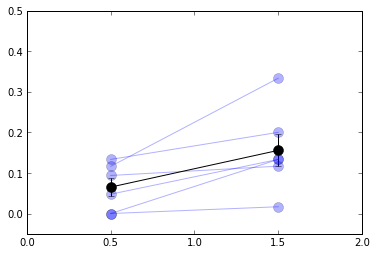

In [19]:
# Compare failure rate
mean_fail_bef = [np.sum(post_LTD50['Before'].loc[i]['failure'])/len(post_LTD50['Before'].loc[i]['failure']) for i in post_LTD50['Before'].index]
mean_fail_aft = [np.sum(post_LTD50['After'].loc[i]['failure'][-60:])/60 for i in post_LTD50['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))


mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.5])

with PdfPages('/data/Figure3_6.pdf') as pdf:
    pdf.savefig()

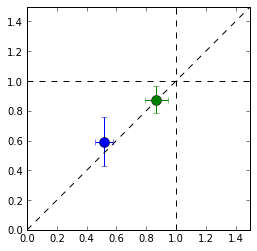

In [20]:
# CV analysis
cv_mean_bef = [np.nanmean(post_LTD2['Before'].loc[i]['raw_amp1'][-20:]) for i in post_LTD2['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(post_LTD2['Before'].loc[i]['raw_amp1'][-6:]) for i in post_LTD2['Before'].index]
end_aft = [post_LTD2['elimi'].values[i] for i in range(len(post_LTD2))]
cv_std_aft = [np.nanstd(post_LTD2['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(post_LTD2['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(post_LTD50['Before'].loc[i]['raw_amp1'][-20:]) for i in post_LTD50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(post_LTD50['Before'].loc[i]['raw_amp1'][-15:]) for i in post_LTD50['Before'].index]
end_aft = [post_LTD50['elimi'].values[i] for i in range(len(post_LTD50))]
cv_std_aft = [np.nanstd(post_LTD50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(post_LTD50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure3_7.pdf') as pdf:
    pdf.savefig()

[0, 60, 0.1, 1.7]

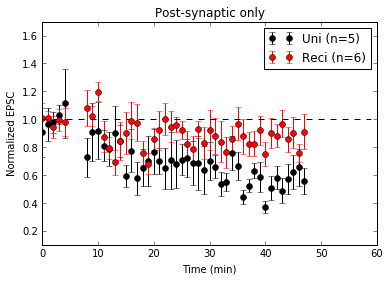

In [21]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ko', label='Uni (n={a})'.format(a=len(post_LTD50_uni)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(post_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only')
plt.axis([0,60,0.1,1.7])